Athena's Code - CBB7400 Final Project

In [2]:

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt

C:\Users\gring\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [92]:
# Download latest version
path = kagglehub.dataset_download("aasheesh200/framingham-heart-study-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\gring\.cache\kagglehub\datasets\aasheesh200\framingham-heart-study-dataset\versions\1


1. Load the Dataset from Kaggle

In [93]:
file_path = "framingham.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aasheesh200/framingham-heart-study-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\gring\AppData\Local\Temp\ipykernel_20456\1386029874.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1

2. Inspection 

In [94]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [95]:
print(df.shape)
df.info()
df.describe()

(4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [96]:
# Missingness per column
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [97]:
target_col = 'TenYearCHD'
#df_clean = df.dropna(subset=[target_col]) -> no NAs in the target column

X = df.drop(columns=[target_col])
y = df[target_col]

print(y.value_counts(normalize=True)) # class imbalance

TenYearCHD
0    0.848113
1    0.151887
Name: proportion, dtype: float64


3. Preprocessing

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocess = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),      # Impute missing values with median
    ('scaler', StandardScaler())
])

4. Logistic Regression Model

In [99]:
lr_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'  # Handle class imbalance
    ))
])

lr_pipeline.fit(X_train, y_train) #preprocess the x and y train data

y_pred = lr_pipeline.predict(X_test)
y_proba = lr_pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       719
           1       0.25      0.60      0.36       129

    accuracy                           0.67       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.81      0.67      0.72       848

Confusion Matrix:
[[493 226]
 [ 52  77]]
ROC-AUC Score: 0.700553093767183


In [100]:
lr = lr_pipeline.named_steps['classifier']
feature_names = X.columns
coefficients = pd.Series(lr.coef_[0], index=feature_names)
odds_ratios = np.exp(coefficients).sort_values(ascending=False)
print("Approx Odds Ratios:")
print(odds_ratios)

Approx Odds Ratios:
age                1.846752
sysBP              1.292025
cigsPerDay         1.291769
male               1.218581
glucose            1.129067
totChol            1.116417
BPMeds             1.095494
prevalentStroke    1.093623
prevalentHyp       1.069869
diabetes           1.055844
diaBP              1.045597
BMI                1.033064
currentSmoker      1.032835
education          0.980384
heartRate          0.959992
dtype: float64


## Storing the Model for future use

In [101]:

import joblib

joblib.dump(lr_pipeline, "logreg_model.pkl")


['logreg_model.pkl']

## Tweaking the model to get rid of 'irrelevant' variables 
- Stepwise manual backwards regression
- Can prevent bloat in our future dashboard

In [102]:

import statsmodels.api as sm

# Fit on train, transform train and test
# using statsmodel as apparently sklearn doesn't give p-values.
#copying the training data first
X_train_proc = preprocess.fit_transform(X_train)
X_test_proc  = preprocess.transform(X_test)

X_train_sm = pd.DataFrame(X_train_proc, columns=X_train.columns, index=X_train.index)
X_test_sm  = pd.DataFrame(X_test_proc,  columns=X_test.columns,  index=X_test.index)

#Add intercept - this is done automatically by sklearn
X_train_sm = sm.add_constant(X_train_sm)

#lassical logistic regression (no regularization), regularization prevents p-values from being calculated
logit_model = sm.Logit(y_train, X_train_sm).fit()

print(logit_model.summary())



Optimization terminated successfully.
         Current function value: 0.374573
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3376
Method:                           MLE   Df Model:                           15
Date:                Sun, 30 Nov 2025   Pseudo R-squ.:                  0.1204
Time:                        13:22:13   Log-Likelihood:                -1270.6
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 5.577e-65
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9982      0.059    -33.645      0.000      -2.115      -1.882
male          

In [103]:

def backward_stepwise(X, y, p_threshold=0.05):
    X_model = sm.add_constant(X.copy())
    variables = list(X_model.columns)
    
    while True:
        model = sm.Logit(y, X_model[variables]).fit(disp=False)
        pvals = model.pvalues.drop("const")
        worst_p = pvals.max() #find highest p value
        worst_var = pvals.idxmax() #find associated varaible with it
        if worst_p > p_threshold: 
            print(f"Removed {worst_var}, p={worst_p:.3f}")
            variables.remove(worst_var) #drop it
        else:
            break #stop once the worst p is below the 0.05 threshold
    
    #fit final model
    final_model = sm.Logit(y, X_model[variables]).fit()
    return final_model, variables

y = df_sm["TenYearCHD"]
X = df_sm.drop(columns=["TenYearCHD"])

final_model, final_variables = backward_stepwise(X_train_sm, y_train)
print("Selected final variables:", final_variables)



Removed currentSmoker, p=0.971
Removed BMI, p=0.900
Removed education, p=0.893
Removed diaBP, p=0.793
Removed diabetes, p=0.679
Removed heartRate, p=0.541
Removed prevalentHyp, p=0.277
Removed BPMeds, p=0.079
Optimization terminated successfully.
         Current function value: 0.375282
         Iterations 7
Selected final variables: ['const', 'male', 'age', 'cigsPerDay', 'prevalentStroke', 'totChol', 'sysBP', 'glucose']


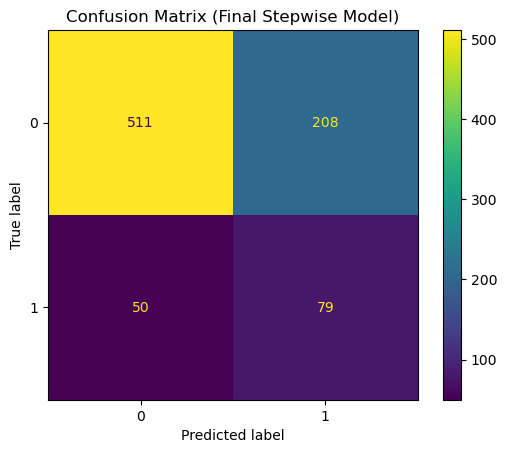

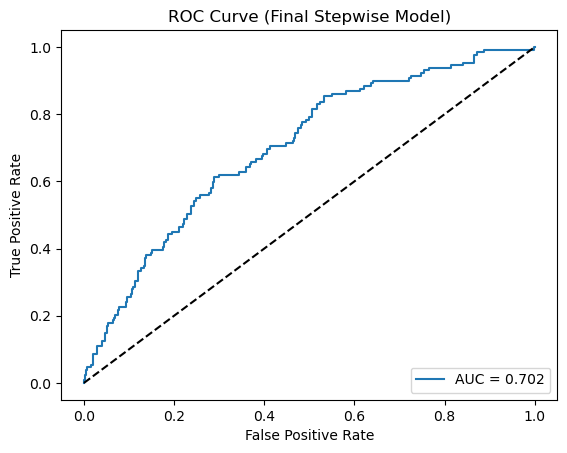

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

#remove const from the final variable list
vars_no_const = [v for v in final_variables if v != "const"]

# subset X to only those predictors, then add a constant
X_test_final = sm.add_constant(X_test_sm[vars_no_const])

# 3. True labels
y_true = y_test

# 4. Predicted probabilities from the final stepwise model
y_proba = final_model.predict(X_test_final)

# 5. Class predictions using 0.5 threshold
y_pred = (y_proba >= 0.1622).astype(int)

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Final Stepwise Model)")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Final Stepwise Model)")
plt.legend(loc="lower right")
plt.show()



In [116]:
# Save the fitted model
#final_model.save("chd_stepwise_model.pkl")

## Re-running the original sklearn model, but only with significant variables

In [117]:
selected_vars = final_variables[1:]

X_train_red = X_train[selected_vars]
X_test_red = X_test[selected_vars]

lr_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'  # Handle class imbalance
    ))
])

lr_pipeline.fit(X_train_red, y_train) #preprocess the x and y train data

y_pred = lr_pipeline.predict(X_test_red)
y_proba = lr_pipeline.predict_proba(X_test_red)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       719
           1       0.25      0.61      0.36       129

    accuracy                           0.67       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.81      0.67      0.71       848

Confusion Matrix:
[[487 232]
 [ 50  79]]
ROC-AUC Score: 0.7010490452933122


In [118]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix (optimal threshold):")
print(confusion_matrix(y_test, y_pred_optimal))

print("\nClassification Report (optimal threshold):")
print(classification_report(y_test, y_pred_optimal))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

0.3556720617918256
Confusion Matrix (optimal threshold):
[[332 387]
 [ 19 110]]

Classification Report (optimal threshold):
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       719
           1       0.22      0.85      0.35       129

    accuracy                           0.52       848
   macro avg       0.58      0.66      0.49       848
weighted avg       0.84      0.52      0.58       848

ROC-AUC Score: 0.7010490452933122


In [119]:
joblib.dump(lr_pipeline, "logreg_model_reduced.pkl")

['logreg_model_reduced.pkl']

5. k-NN 

In [21]:
knn_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier())
])
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_knn_pred = best_knn.predict(X_test)
y_knn_proba = best_knn.predict_proba(X_test)[:, 1]

print("k-NN Classification Report:")
print(classification_report(y_test, y_knn_pred))
print("k-NN Confusion Matrix:")
print(confusion_matrix(y_test, y_knn_pred))
print("k-NN ROC-AUC Score:", roc_auc_score(y_test, y_knn_proba))

Best Parameters: {'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.44      0.05      0.10       129

    accuracy                           0.85       848
   macro avg       0.65      0.52      0.51       848
weighted avg       0.79      0.85      0.79       848

k-NN Confusion Matrix:
[[710   9]
 [122   7]]
k-NN ROC-AUC Score: 0.6329743075546356


6. Random Forest

In [26]:
random_forest_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        random_state=42
    ))
])

param_grid = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(random_forest_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best RF Parameters:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_

y_rf_pred = best_rf.predict(X_test)
y_rf_proba = best_rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_rf_pred))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_rf_proba))

Best RF Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       719
           1       0.25      0.50      0.33       129

    accuracy                           0.69       848
   macro avg       0.57      0.61      0.57       848
weighted avg       0.79      0.69      0.73       848

Random Forest Confusion Matrix:
[[522 197]
 [ 64  65]]
Random Forest ROC-AUC Score: 0.6753997261485051


In [42]:
rf = best_rf.named_steps["classifier"]
rf_importances = pd.Series(rf.feature_importances_, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)

print("Top 10 RF feature importances:")
print(rf_importances.head(10))

Top 10 RF feature importances:
age             0.286546
sysBP           0.164737
diaBP           0.088945
prevalentHyp    0.081806
totChol         0.073960
glucose         0.071369
BMI             0.056379
heartRate       0.041487
cigsPerDay      0.040474
male            0.032350
dtype: float64


7. ROC curves

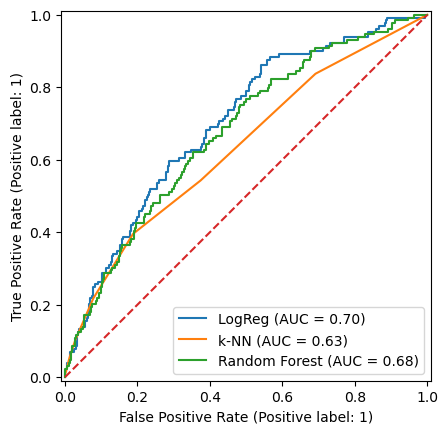

In [27]:
figure, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_proba, name="LogReg", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_knn_proba, name="k-NN", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_rf_proba, name="Random Forest", ax=ax)
ax.plot([0, 1], [0, 1], '--')  # Diagonal line
plt.show()

8. Continutation with Logistic Regression

In [39]:
def metrics_threshold(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    conf_mat = confusion_matrix(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=[0,1])
    return {
        "threshold": threshold,
        "confusion matrix": conf_mat,
        "precision": precision[1],
        "recall": recall[1],
        "f1-score": f1[1]
    }
thresholds = np.array([0.1, 0.3, 0.5, 0.7, 0.91])
results = [metrics_threshold(y_test, y_proba, t) for t in thresholds]
for res in results:
    print(
        f"t={res['threshold']:.1f} |"
        f" Precision: {res['precision']:.2f} |"
        f" Recall: {res['recall']:.2f} |"
        f" F1-Score: {res['f1-score']:.2f}"
    )

print("-" * 30)
print(res['confusion matrix'])
print("-" * 30)


t=0.1 | Precision: 0.15 | Recall: 0.99 | F1-Score: 0.27
t=0.3 | Precision: 0.20 | Recall: 0.89 | F1-Score: 0.32
t=0.5 | Precision: 0.25 | Recall: 0.60 | F1-Score: 0.36
t=0.7 | Precision: 0.33 | Recall: 0.26 | F1-Score: 0.29
t=0.9 | Precision: 1.00 | Recall: 0.02 | F1-Score: 0.03
------------------------------
[[719   0]
 [127   2]]
------------------------------


Want to prioritize sensitivity over precision as this is a risk-prediction/screening CDS tool
    -> missing high risk patients (false negative) is more problematic than flagging a low risk one (false positive)
    -> go for threshold of 0.3 as primary CDS threshold, bc recall is nearly 0.9 -> catch almost 9/10 of future CHD cases


Calibration Check

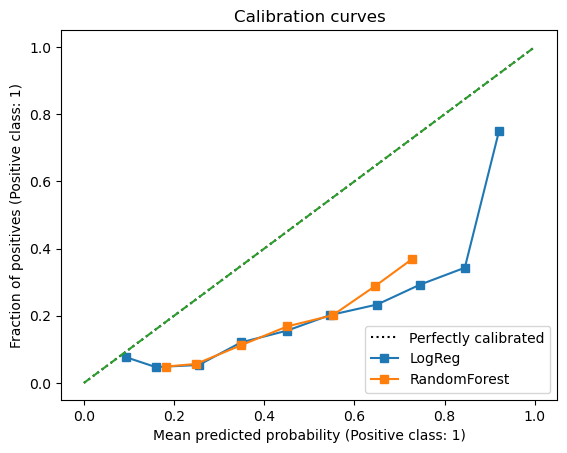

In [45]:
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()
CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10,
                                    name="LogReg", ax=ax)
CalibrationDisplay.from_predictions(y_test, y_proba_rf, n_bins=10,
                                    name="RandomForest", ax=ax)
ax.plot([0, 1], [0, 1], "--")
ax.set_title("Calibration curves")
plt.show()

Model systematically overestimates absolute risk -> predicted probabilities should be interpreted relatively (higher vs lower risk), not as a precise 10 year risk percentage. 
-> In a real deployment, you would recalibrate the model on local data before using its probabilities to drive treatment thresholds.

Recalibration - Applying probability calibration

/opt/homebrew/anaconda3/envs/AIintro_h2/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/anaconda3/envs/AIintro_h2/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/anaconda3/envs/AIintro_h2/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/anaconda3/envs/AIintro_h2/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/homebrew/anaconda3/envs/AIintro_h2/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in 

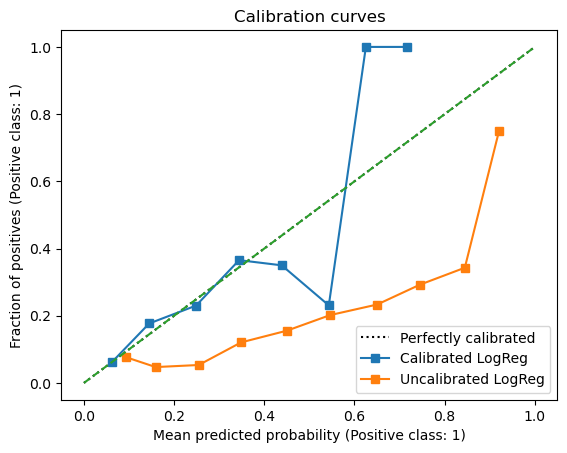

In [49]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.pipeline import Pipeline

calibrated_logref = CalibratedClassifierCV(lr_pipeline, method='sigmoid', cv=3)
calibrated_logref.fit(X_train, y_train)
y_calibrated_proba = calibrated_logref.predict_proba(X_test)[:, 1]

figure, ax = plt.subplots()
CalibrationDisplay.from_predictions(y_test, y_calibrated_proba, n_bins=10,
                                    name="Calibrated LogReg", ax=ax)
CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=10,
                                    name="Uncalibrated LogReg", ax=ax)
ax.plot([0, 1], [0, 1], "--")
ax.set_title("Calibration curves")
plt.show()

Feature Importance

In [41]:
print("Top 10 features by odds ratio (per 1 SD increase):")
print(odds_ratios.head(10))

print("\nLowest 10 (protective) features:")
print(odds_ratios.tail(10))

Top 10 features by odds ratio (per 1 SD increase):
age                1.846093
sysBP              1.292074
cigsPerDay         1.291945
male               1.218590
glucose            1.129075
totChol            1.116381
BPMeds             1.095531
prevalentStroke    1.093458
prevalentHyp       1.070108
diabetes           1.055744
dtype: float64

Lowest 10 (protective) features:
totChol            1.116381
BPMeds             1.095531
prevalentStroke    1.093458
prevalentHyp       1.070108
diabetes           1.055744
diaBP              1.045656
BMI                1.033068
currentSmoker      1.032754
education          0.980406
heartRate          0.960125
dtype: float64


In [11]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/39/60/868371b6482ccd9ef423c6f62650066cf8271fdb2ee84f192695ad6b7a96/streamlit-1.51.0-py3-none-any.whl.metadata
  Obtaining dependency information for altair!=5.4.0,!=5.4.1,<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.5.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<7,>=4.0 from https://files.pythonhosted.org/packages/e6/46/eb6eca305c77a4489affe1c5d8f4cae82f285d9addd8de4ec084a7184221/cachetools-6.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<7,>=3.20 from https://files.pythonhosted.org/packages/a6/79/8780a378c650e3df849b73de8b13cf5412f521ca2ff9b